Data Scientist in Risk and Fraud analytics


- Develop and deploy machine learning models to detect, predict, and prevent fraudulent transactions and behavior patterns.(use fraud detection tools)
- Design and monitor KPIs to evaluate model performance and improve fraud detection systems over time.
- Understanding of supervised and unsupervised fraud detection techniques, including anomaly detection, behavioral modeling, and network analysis.
-  identify patterns and trends from data.

- deploying machine learning models, statistical methods, and data-driven strategies to detect risky behaviors and prevent fraudulent activities across our products and services.
- Conduct deep-dive investigations into fraud cases, creating detailed reports and actionable insights to detect risky behavior and prevent fraudulent activities across various systems and services.
- Stay current with emerging fraud techniques, industry best practices, and data science tools

Experience working with large datasets and cloud platforms (e.g., AWS, GCP, Azure).

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction binary classififcation problem.Huge imbalance dataset 

In [2]:
import sklearn
print(sklearn.__version__)  # should show 1.3.2

1.3.2


In [3]:
# !pip install scikit-learn==1.3.2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")



pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn
<!-- pip install scikit-learn -->
pip install scikit-learn==1.3.2
pip install xgboost
pip install imbalanced-learn


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

 STEP 1: Exploratory Data Analysis (EDA)
 Discover patterns, detect anomalies, and understand features

In [5]:
df = pd.read_csv('AIML_Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Step 1: Data Analysis
- statistical summary
- Outlier detection
- Pattern matchig
-Correlation matrics
- Daue /Time handling

Statistical summary using
- df.describe()
- df.info()
- df.isnull().sum()

 use info( ) to learn abot data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


check the columns to find the fraud feature

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

count the no of fraud and non fraud transactions

In [8]:
# df.isFraud.count()
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
# df.isFraud.count() in terms of percentage

df['isFraud'].value_counts(normalize=True)
# this indiccates class imbalance in data set (with 99 % non faud and 1% fraud data. So accuracy is not high in predicted model)


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

The above results show that the data set is highly imbalance with 99.87% non fraud data (class 0) and 1.2% fraudulent data (class 1). this affects the accuracy in the predicted model . So we need to balance the data set

In [10]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Check for NA vales

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# df shape
df.shape

(6362620, 11)

In [13]:
# df fraud %
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100,2)

0.13

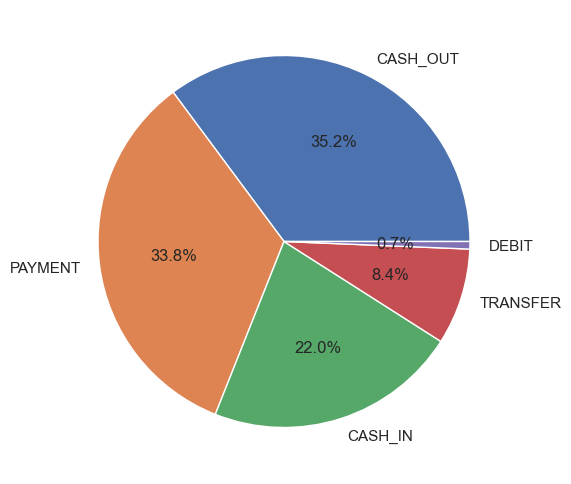

In [14]:
# in the feature 'type', gives the type of transaction made. So let us make a pie plot to find the most 'popular tyoe'
plt.figure(figsize=(6,8))
plt.pie(df['type'].value_counts(),
       labels=df['type'].value_counts().index,
       autopct='%1.1f%%');

bar chart of each transaction type

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CASH_OUT'),
  Text(1, 0, 'PAYMENT'),
  Text(2, 0, 'CASH_IN'),
  Text(3, 0, 'TRANSFER'),
  Text(4, 0, 'DEBIT')])

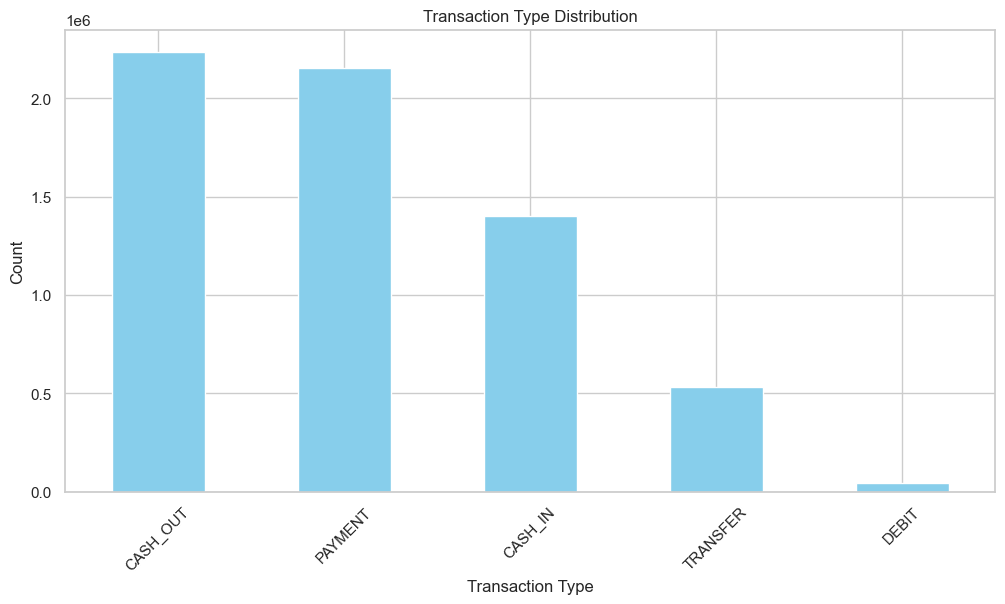

In [15]:
df['type'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)     

group fraud rate by each transaction type

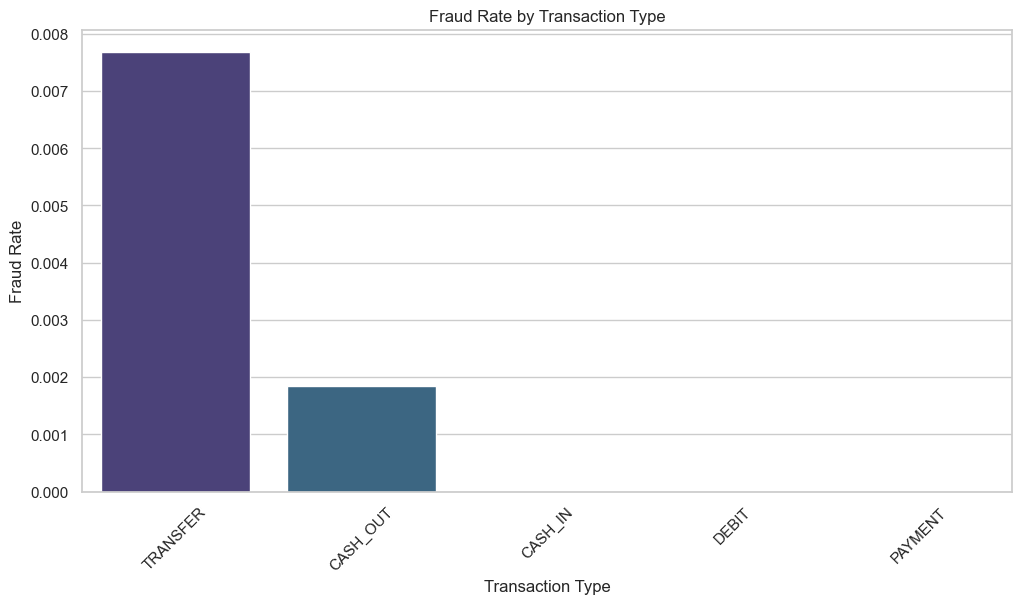

In [16]:
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().reset_index()
fraud_rate_by_type = fraud_rate_by_type.sort_values(by='isFraud', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='isFraud', data=fraud_rate_by_type, palette='viridis')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()


In [17]:
fraud_rate_by_type

,type,isFraud
4,TRANSFER,0.007688
1,CASH_OUT,0.001840
0,CASH_IN,0.000000
2,DEBIT,0.000000
3,PAYMENT,0.000000


In [18]:
# statistcs
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

Ploting the numerical features (amount,oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) for distribution check using histplot


KeyboardInterrupt: 

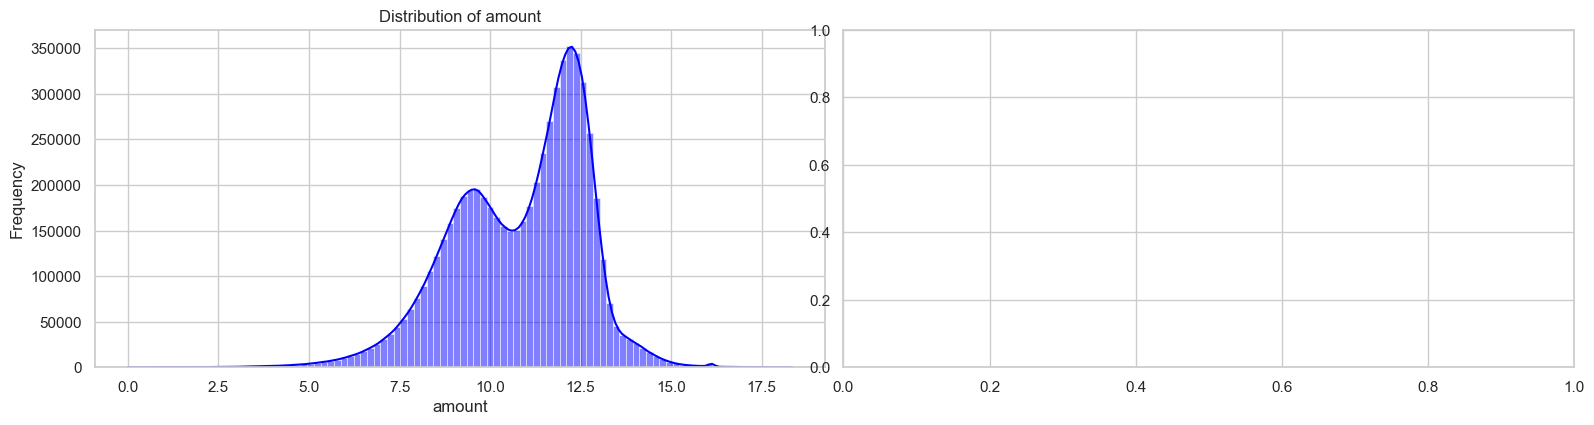

In [19]:
# Numerical features of interest
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plot distribution for each feature
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    # sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='green')
    # sns.histplot(df[col], bins=100, kde=True)
    sns.histplot(np.log1p(df[col]), bins=100, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [ ]:
sns.histplot(df['amount'], bins=100, kde=True, color='green')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Draw the same histogram plot in log scale

In [ ]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='green')
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

# correlation plot that gives the corelation between multiple features including target  (use heatmap)
Since there are no missing values in any of the features, and only the numerical features are meaningful for a correlation matrix, we can proceed by excluding the categorical and string columns (type, nameOrig, nameDest) and plotting the correlation matrix for the remaining numerical ones.

In [ ]:
# Drop non-numeric columns for correlation
df_numeric = df.drop(columns=['type', 'nameOrig', 'nameDest'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap (correlation can take values between -1 and 1)
# 1 - highly positive corre; -1 - highly neg corr; 0- no correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

Relationship between fraud and amount using box plot

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df, showfliers=False)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < 50000], showfliers=False)
plt.title('Transaction Amounts by Fraud Status (Amount < 50k)')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

The box plot comparing transaction amounts by fraud status 
shows that fraudulent transactions generally involve higher amounts
than non-fraudulent ones. The median transaction amount for fraud cases 
is significantly greater, and the interquartile range is wider, indicating
more variability. This suggests that fraudsters tend to target larger
transactions. Additionally, after filtering for amounts less than 50,000,
 the difference remains noticeable, confirming that even among smaller 
transactions, frauds are associated with higher amounts compared to 
non-fraudulent transactions.

Balance change and anamolies

In [ ]:
df.columns


In [ ]:
df['balance_diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df[['oldbalanceOrg', 'newbalanceOrig', 'balance_diffOrg']].head()

balance diffrence of the destination

In [ ]:
df['balance_diffDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df[['oldbalanceDest', 'newbalanceDest', 'balance_diffDest']].head()

In [ ]:
# Count negative values for balance_diffOrg and balance_diffDest
num_negative_balance_diffOrg = (df['balance_diffOrg'] < 0).sum()
num_negative_balance_diffDest = (df['balance_diffDest'] < 0).sum()

print(f"Negative balance_diffOrg: {num_negative_balance_diffOrg}")
print(f"Negative balance_diffDest: {num_negative_balance_diffDest}")

In [ ]:
fraud_per_step = df[df['isFraud'] == 1].groupby('step')['isFraud'].count()
plt.figure(figsize=(14, 6))
fraud_per_step.plot()
plt.title('Number of Fraudulent Transactions per Step')
plt.xlabel('Step')
plt.ylabel('Fraud Count')
plt.grid(True)
plt.show()

drop the coloumn 'step' from the original df

In [ ]:
# df.drop(columns=['step'], inplace=True)

Step 2: Data Preprocessing/ Data Preparation:
- Time series
- Missing value imputation
- Normalization
- Imbalanced Data Processing
- Sampling
- Testing / Validation split
- Filtering
- Feature selection
- Date/time Algebra


In [ ]:
# lets identify the customers who are top senders and top receivers
topsenders = df['nameOrig'].value_counts().head(10)
topsenders

In [ ]:
topreceivers = df['nameDest'].value_counts().head(10)
topreceivers

In [ ]:
# Fraud making customers
fraud_users = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
fraud_users 

In [ ]:
# it si already observed that fraud rate is high mainly duirng 'transfer ' and 'cash_out' type transactions 
fraud_types = df[df['type'].isin(['TRANSFER','CASH_OUT'])]
fraud_types

In [ ]:
fraud_types['type'].value_counts()

In [ ]:
sns.countplot(data=fraud_types,x= 'type', hue='isFraud')
plt.title('Fraud distribution during TRANSFER and CASH_OUT')
plt.show()
# orange portion is not visible in graph

In [ ]:
# let us find the names and other details of customers(senders) whose balance went zero during fraudulent transaction('cash_out' and 'transfer')
# create a df using three filters
zero_after_trans = df[
    (df['oldbalanceOrg']> 0) &
    (df['newbalanceOrig'] ==0) &
    (df['type'].isin(['TRANSFER','CASH_OUT']))    
]
zero_after_trans.head()

In [ ]:
len(zero_after_trans)
# indicates the no of fraudulent trans

In [ ]:
# Calculate percentage distribution
fraud_distribution = df['isFraud'].value_counts(normalize=True) * 100
labels = ['Non-Fraud', 'Fraud']
colors = ['skyblue', 'salmon']

# Plot pie chart
plt.figure(figsize=(4, 6))
plt.pie(fraud_distribution, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

The above results show that the data set is highly imbalance with 99.87% non fraud data (class 0) and 1.2% fraudulent data (class 1). this affects the accuracy in the predicted model . So we need to balance the data set

In [ ]:
# feature selection and preparation to handle class imbalance

In [40]:
# ! pip install scikit-learn

In [20]:
# !pip install xgboost

Step 3: Model Training for binary classification (fraud and non fraud) prediction
- XGBoost
- Random forest
- K means
- SVM
- Logistic Regression


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
from sklearn.svm import SVC

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Means Clustering
from sklearn.cluster import KMeans

# XGBoost Classifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
# let us remove teh unnecessary columns while creating the model to predict fraud. 
df_model = df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [23]:
y = df_model['isFraud']
X = df_model.drop(['isFraud'], axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

Using Column transformer pipeline
1. Apply different preprocessing steps to different feature types (e.g., numerical vs categorical),

2. Combine them using ColumnTransformer,

3. Chain it into a full Pipeline with a classifier or regressor.

In [25]:
# Defining the columns as separating the muerical and categorical data
categorical_features = ['type']
numerical_features = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [26]:
# Define Preprocessing for Each Column Type
# 1. drop='first':
# Purpose: To avoid multicollinearity (especially for linear models like Logistic Regression).
# Drops the first category from each categorical feature.If a categorical feature has 3 categories (A, B, C),
# it encodes only B and C. A is inferred when both are 0.
# 2. handle_unknown='ignore':
# Purpose: To safely handle unseen categories in test data that weren’t present in training.
# If your training data contains categories ['A', 'B'] but test data contains 'C', this option avoids a crash
# Best Practice — Combine Both:
# But drop='first' is not recommended for folowing Tree-based Models:
# Decision trees (like Random Forest, XGBoost) do not suffer from multicollinearity.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [27]:
# Combine with ColumnTransformer
# preprocessing using column transformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat',categorical_transformer, categorical_features)
    ], 
    remainder = 'drop'   # optional: drop other columns not listed
)

In [28]:
# !pip install scikit-learn==1.3.2

In [29]:
import sklearn
print(sklearn.__version__)  # should show 1.3.2


1.3.2


In [30]:
from imblearn.pipeline import Pipeline  # NOT sklearn.pipeline
from imblearn.over_sampling import SMOTE

 pipeline = Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced', max_iter=1000)
    
 ])

- When to Use SMOTE? (Synthetic Minority Over-sampling Technique) is a powerful way to generate synthetic examples of the minority class (fraud).
Apply SMOTE only to the training data, after preprocessing but before model training.
This avoids:
Data leakage (synthesizing frauds using knowledge of the test set),Overfitting to synthetic data in test metrics.
- Where to Apply SMOTE in Your Pipeline
- Don't apply SMOTE inside Pipeline if it includes train_test_split.
Instead, apply SMOTE after splitting data and before fitting model.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced', max_iter=1000))
])



Model training using pipeline - use the 'fit' command

In [32]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [35]:
# make predictions
y_pred= pipeline.predict(X_test)

In [36]:
# compare y_pred with y_test using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [37]:
!pip install xgboost

In [39]:
# Models dictionary (10 min to run)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
  }

# Train each model inside a pipeline
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results[name] = {
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'Accuracy': report['accuracy']
    }

# View results
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy
Logistic Regression   0.907354  0.385552  0.541156  0.999156
Decision Tree         0.891591  0.877841  0.884663  0.999705
XGBoost               0.936458  0.729708  0.820255  0.999587


In [40]:
confusion_matrix(y_test,y_pred)

array([[1906200,     122],
       [    666,    1798]], dtype=int64)

In [41]:
# accuracy of testing data
pipeline.score(X_test,y_test)

0.9471360330597564

For better precision and accuracy of class imbalance data use
1. SMOTE (a kind of oversampling the minority class) or
2. undersampling method

In [42]:
# undersampling method as follows
non_fraud_data = df[df['isFraud']==0]
fraud_data = df[df['isFraud']==1]

In [43]:
non_fraud_data.shape

(6354407, 11)

In [44]:
fraud_data.shape

(8213, 11)

In [45]:
# resample  or undersample the 'non fraud' data to match the 'fraud data size'
resampled_nonfraud_data = non_fraud_data.sample(n=8213)
resampled_nonfraud_data.shape

(8213, 11)

In [46]:
# concatenate resampled non_fraud with fraud dat which has sample size of 8123 ==> 8213+8213
undersampled_data = pd.concat([resampled_nonfraud_data,fraud_data], ignore_index = True)
undersampled_data.shape 

(16426, 11)

In [47]:
# check fraud and non fraud distribution
undersampled_data['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [48]:
# split X and y
X_us = undersampled_data.drop('isFraud', axis = 1)
y_us= undersampled_data['isFraud']

In [49]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.3, random_state = 42)

In [50]:
# Models dictionary already defined
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0
#   }

# # Train each model inside a pipeline
# results = {}
# for name, model in models.items():
#     pipe = Pipeline([
#         ('prep', preprocessor),
#         ('clf', model)
#     ])

pipe.fit(X_train_us, y_train_us)
y_pred_us = pipe.predict(X_test_us)
report_us = classification_report(y_test_us, y_pred_us, output_dict=True, zero_division=0)
results[name] = {
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score'],
    'Accuracy': report['accuracy']
}

# View results
us_results_df = pd.DataFrame(results).T
print(us_results_df)

                     Precision    Recall  F1-Score  Accuracy
Logistic Regression   0.907354  0.385552  0.541156  0.999156
Decision Tree         0.891591  0.877841  0.884663  0.999705
XGBoost               0.936458  0.729708  0.820255  0.999587


using SMOTE (oversampling maethod)

In [51]:
from imblearn.over_sampling import SMOTE

Drop or encode non-numeric features first

Preprocess with StandardScaler and OneHotEncoder via ColumnTransformer

Apply SMOTE to preprocessed numeric data

In [52]:
from imblearn.pipeline import Pipeline
# # resampling done using the command 'SMOTE'
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), numerical_features),
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
# ])

pipe = Pipeline([
    ('prep', preprocessor),          # preprocessing includes string column names
    ('smote', SMOTE(random_state=42)),  # oversampling works on numeric output of preprocessor
    ('clf', LogisticRegression(max_iter=1000))
])

# Split before applying SMOTE (which is now in pipeline)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)


1. Classification Report

In [53]:

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results[name] = {
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score'],
    'Accuracy': report['accuracy']
}

# View results
smote_results_df = pd.DataFrame(results).T
print(smote_results_df)

                     Precision    Recall  F1-Score  Accuracy
Logistic Regression   0.907354  0.385552  0.541156  0.999156
Decision Tree         0.891591  0.877841  0.884663  0.999705
XGBoost               0.022425  0.950804  0.043817  0.946441


In [54]:
# oversampling here should be based on the minority class 'fraud =1' and undersampling should be based on majority class 'fraud = 0'

Step 4: Model Evaluation
- ROC table
- error rate
- Confusion matrics
-R squared
- MSE
- Cross validation


In [55]:
y_proba = pipe.predict_proba(X_test)[:, 1]  # For ROC AUC
y_proba

array([6.31915364e-03, 1.54832605e-10, 8.37503648e-01, ...,
       2.35078975e-10, 5.80115361e-13, 1.50260511e-10])

2. Confusion Matrix


True Positives (fraud correctly caught)

False Positives (false alarms)

False Negatives (missed fraud)

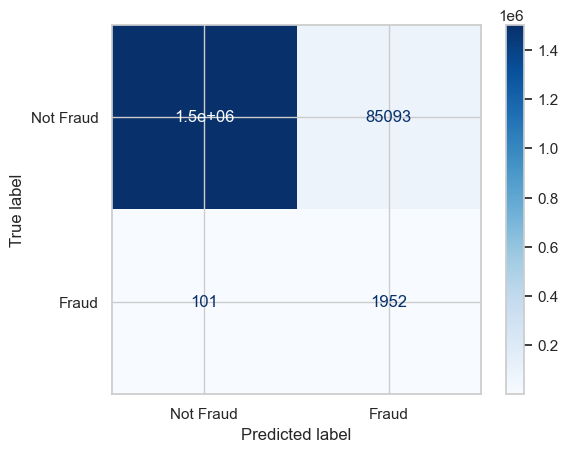

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')


3. ROC Curve + AUC Table
   for imbalanced problems — tells how well the model ranks fraud vs non-fraud.

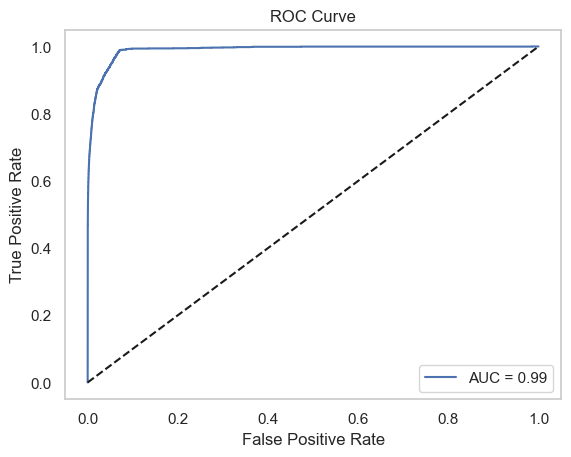

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


k fold Cross-Validation

In [58]:
# If you want to validate your model’s average performance across multiple folds: k= 5

In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='f1')  # or 'roc_auc', 'accuracy'
print("5-Fold CV F1-Score:", cv_scores)
print("Mean F1:", cv_scores.mean())


5-Fold CV F1-Score: [0.03733953 0.04352933 0.04552985 0.04840122 0.04872521]
Mean F1: 0.04470502854152025


FRAUD AND RISK ANALYSIS
- fraud analysis (detecting fraudulent patterns)
- risk analysis (understanding behaviors that increase fraud risk).

1. FRAUD ANALYSIS
Goal: Detect and understand fraud patterns
- What types of transactions are most likely to be fraud?

- Are there specific time windows or amounts that show higher fraud?

- Which accounts or destinations are repeatedly involved in fraud?

<Axes: xlabel='type', ylabel='count'>

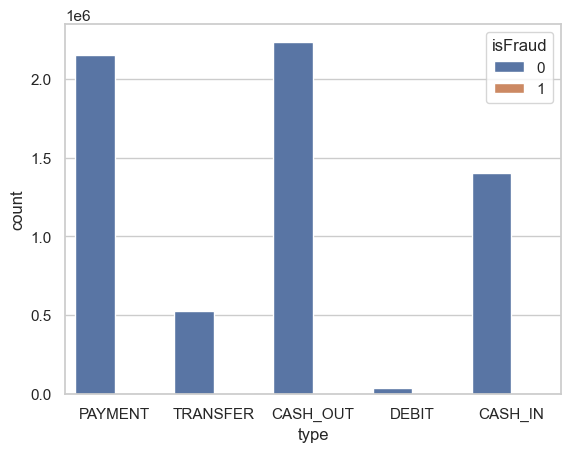

In [60]:
# Shows which types (TRANSFER, CASH_OUT) are most fraud-prone
import seaborn as sns
sns.countplot(data=df, x='type', hue='isFraud')


<Axes: xlabel='isFraud', ylabel='amount'>

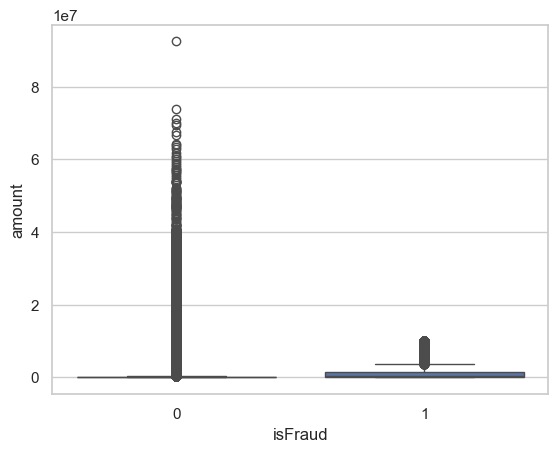

In [61]:
# Amount Distribution for Fraud vs. Non-Fraud
# Are frauds happening at high or specific amounts? (< $50000)
sns.boxplot(data=df, x='isFraud', y='amount')


<Axes: xlabel='hour', ylabel='Count'>

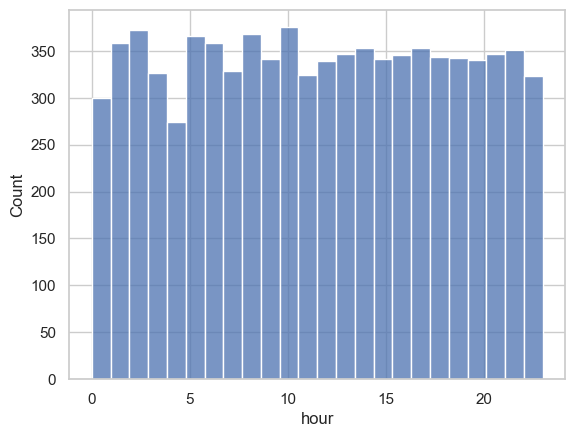

In [62]:
# Hourly Trend of Fraud
# Identify time-of-day with higher fraud activity.
df['hour'] = df['step'] % 24
sns.histplot(data=df[df['isFraud']==1], x='hour', bins=24)


In [63]:
# Frequent Fraudulent Accounts
# Flag accounts with repeated frauds.
df[df['isFraud']==1]['nameOrig'].value_counts().head()


nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
Name: count, dtype: int64

In [64]:
# Origin–Destination Behavior
# let us find the names and other details of customers(senders) whose balance went zero during fraudulent transaction('cash_out' and 'transfer')
# create a df using three filters
zero_after_trans = df[
    (df['oldbalanceOrg']> 0) &
    (df['newbalanceOrig'] ==0) &
    (df['type'].isin(['TRANSFER','CASH_OUT']))    
]
zero_after_trans.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


2. RISK ANALYSIS
Goal: Identify accounts or transaction profiles at high risk of future fraud

a. Flag Suspicious Transactions Even If Not Labeled Fraud:

TRANSFER or CASH_OUT with:
- zero original balance (oldbalanceOrg == 0)
- large amount transferred
- no change in destination balance

In [65]:
risky = df[
    (df['type'].isin(['TRANSFER', 'CASH_OUT'])) &
    (df['oldbalanceOrg'] == 0) &
    (df['amount'] > 10000) &
    (df['newbalanceDest'] == df['oldbalanceDest'])
]


b.Create a Risk Score Per Account
- Use heuristics or a model to score:
- Sort by risk score to monitor accounts

In [66]:
df['riskScore'] = (
    (df['amount'] > 10000).astype(int) +
    (df['oldbalanceOrg'] == 0).astype(int) +
    (df['type'].isin(['TRANSFER', 'CASH_OUT'])).astype(int)
)
df['riskScore']

0          0
1          0
2          1
3          1
4          1
          ..
6362615    2
6362616    2
6362617    2
6362618    2
6362619    2
Name: riskScore, Length: 6362620, dtype: int32

c.Unsupervised Anomaly Detection:
- Use Isolation Forest or Autoencoders to catch unknown fraud:
- anomaly = -1 are suspicious

In [67]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df[numerical_features])
df['anomaly']

0          1
1          1
2          1
3          1
4          1
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: anomaly, Length: 6362620, dtype: int32

 export the trained models for use in your Streamlit app:

In [68]:
# Logistic Regression Training with Export
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib

pipe_logreg = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_logreg.fit(X_train, y_train)
joblib.dump(pipe_logreg, 'fraud_model_logreg.pkl')  # Save model

# Decision Tree Training with Export
from sklearn.tree import DecisionTreeClassifier

pipe_tree = Pipeline([
    ('prep', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe_tree.fit(X_train, y_train)
joblib.dump(pipe_tree, 'fraud_model_tree.pkl')  # Save model


['fraud_model_tree.pkl']

In [69]:
model = joblib.load("fraud_model_logreg.pkl")  # or fraud_model_tree.pkl


Step 5 Deployment